In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

In [45]:
sc_df = pd.read_csv("sc.dataset.csv")

In [46]:
#Show the features ( —columns) and the data in the dataframe
sc_df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [47]:
#Get a summary on the dataframe including datatypes and shape.
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [48]:
#finding null values in the dataset
sc_df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [49]:
#finding mode for Shipment
print(sc_df['Shipment Mode'].value_counts())

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64


In [50]:
#replacing null values with mode
sc_df['Shipment Mode'] = sc_df['Shipment Mode'].fillna('Air')
print(sc_df['Shipment Mode'].value_counts())

Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64


In [51]:
#finding mode for Dosage
print(sc_df['Dosage'].value_counts())

300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
100/25mg            73
60/30mg             73
600/300mg           63
1mg/ml              54
300/100mg           54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
500/25mg            13
80mg/ml             13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
133.3/33.3m

In [52]:
#droping null values of Dosage column
sc_df.dropna(how='any', subset=['Dosage'], inplace=True)

In [53]:
#replacing null values in Line Item Insurance with mean
sc_df['Line Item Insurance (USD)'] = sc_df['Line Item Insurance (USD)'].fillna(sc_df['Line Item Insurance (USD)'].mean())

In [54]:
#changing data type to datetime
sc_df['Scheduled Delivery Date'] = pd.to_datetime(sc_df['Scheduled Delivery Date'])
sc_df['Delivered to Client Date'] = pd.to_datetime(sc_df['Delivered to Client Date'])
sc_df['Delivery Recorded Date'] = pd.to_datetime(sc_df['Delivery Recorded Date'])
sc_df.dtypes

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date            object
PO Sent to Vendor Date                  object
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

In [55]:
#identifying irrelevant entries
print(sc_df['PQ First Sent to Client Date'].value_counts())

Pre-PQ Process       1918
9/11/2014             205
Date Not Captured     205
7/11/2013             173
4/30/2014             123
                     ... 
8/3/2009                1
12/23/2013              1
2/1/2012                1
5/16/2011               1
4/6/2010                1
Name: PQ First Sent to Client Date, Length: 581, dtype: int64


In [56]:
#removing those enteries by dropping those rows
sc_df.drop(sc_df[sc_df['PQ First Sent to Client Date'] == 'Date Not Captured'].index, inplace = True)
sc_df.drop(sc_df[sc_df['PQ First Sent to Client Date'] == 'Pre-PQ Process'].index, inplace = True)
sc_df['PQ First Sent to Client Date'] = pd.to_datetime(sc_df['PQ First Sent to Client Date'])
sc_df.dtypes

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date                  object
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

In [57]:
sc_df['Days to Deliver'] = sc_df['Delivered to Client Date'] - sc_df['PQ First Sent to Client Date']
sc_df.dtypes

ID                                        int64
Project Code                             object
PQ #                                     object
PO / SO #                                object
ASN/DN #                                 object
Country                                  object
Managed By                               object
Fulfill Via                              object
Vendor INCO Term                         object
Shipment Mode                            object
PQ First Sent to Client Date     datetime64[ns]
PO Sent to Vendor Date                   object
Scheduled Delivery Date          datetime64[ns]
Delivered to Client Date         datetime64[ns]
Delivery Recorded Date           datetime64[ns]
Product Group                            object
Sub Classification                       object
Vendor                                   object
Item Description                         object
Molecule/Test Type                       object
Brand                                   

In [58]:
#finding and removing the incorrect enteries
print(sc_df['PO Sent to Vendor Date'].value_counts())
sc_df.drop(sc_df[sc_df['PO Sent to Vendor Date'] == 'Date Not Captured'].index, inplace = True)

N/A - From RDC    3735
3/19/2010           78
8/29/2014           76
10/9/2014           69
12/2/2013           67
                  ... 
12/18/2009           1
1/7/2011             1
11/26/2009           1
1/16/2015            1
11/1/2011            1
Name: PO Sent to Vendor Date, Length: 488, dtype: int64


In [59]:
#finding non-numerical data
print(sc_df['Weight (Kilograms)'].value_counts())

Weight Captured Separately    948
See DN-3015 (ID#:82554)        12
9                              12
6                              12
21                             12
                             ... 
2334                            1
24904                           1
3301                            1
2192                            1
11720                           1
Name: Weight (Kilograms), Length: 3497, dtype: int64


In [60]:
#replacing string enteries with null value
import re
sc_df['Weight (Kilograms)']=sc_df['Weight (Kilograms)'].replace(to_replace ='See', value = np.NAN, regex = True)
sc_df['Weight (Kilograms)']=sc_df['Weight (Kilograms)'].replace('Weight Captured Separately', np.NAN)
print(sc_df['Weight (Kilograms)'].value_counts())

21       12
9        12
6        12
22       11
36       10
         ..
20845     1
4758      1
631       1
3402      1
475       1
Name: Weight (Kilograms), Length: 2626, dtype: int64


In [61]:
sc_df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                             0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [62]:
#changing data type into float
sc_df['Weight (Kilograms)'] = sc_df['Weight (Kilograms)'].astype(float)

In [63]:
#replacing the null values with mean on the weight column
sc_df['Weight (Kilograms)'] = sc_df['Weight (Kilograms)'].fillna(sc_df['Weight (Kilograms)'].mean())

In [64]:
#dropping unnecessary columns
sc_df.drop('ID', axis=1, inplace=True)
sc_df.drop('Project Code', axis=1, inplace=True)
sc_df.drop('ASN/DN #', axis=1, inplace=True) 
sc_df.drop('PQ #', axis=1, inplace=True) 

In [65]:
#identifying the string entries in the freight cost column
print(sc_df['Freight Cost (USD)'].value_counts())

Freight Included in Commodity Cost    967
Invoiced Separately                   130
9736.1                                 36
6147.18                                27
13398.06                               16
                                     ... 
9341.81                                 1
1113.01                                 1
5419.21                                 1
17075.43                                1
1472.41                                 1
Name: Freight Cost (USD), Length: 3988, dtype: int64


In [66]:
#replacing those entries with NAN
sc_df['Freight Cost (USD)']=sc_df['Freight Cost (USD)'].replace(to_replace ='See', value = np.NAN, regex = True)
sc_df['Freight Cost (USD)']=sc_df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost', np.NAN)
sc_df['Freight Cost (USD)']=sc_df['Freight Cost (USD)'].replace('Invoiced Separately', np.NAN)
print(sc_df['Freight Cost (USD)'].value_counts())

9736.1      36
6147.18     27
13398.06    16
1211.48     11
25231.96    11
            ..
129.75       1
14767.58     1
21180.7      1
9325.16      1
757.42       1
Name: Freight Cost (USD), Length: 3116, dtype: int64


In [67]:
sc_df.isnull().sum()

PO / SO #                          0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                             0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)                 0
F

In [68]:
#replacing those null values with mean
sc_df['Freight Cost (USD)'] = sc_df['Freight Cost (USD)'].astype(float)
sc_df['Freight Cost (USD)'] = sc_df['Freight Cost (USD)'].fillna(sc_df['Freight Cost (USD)'].mean())

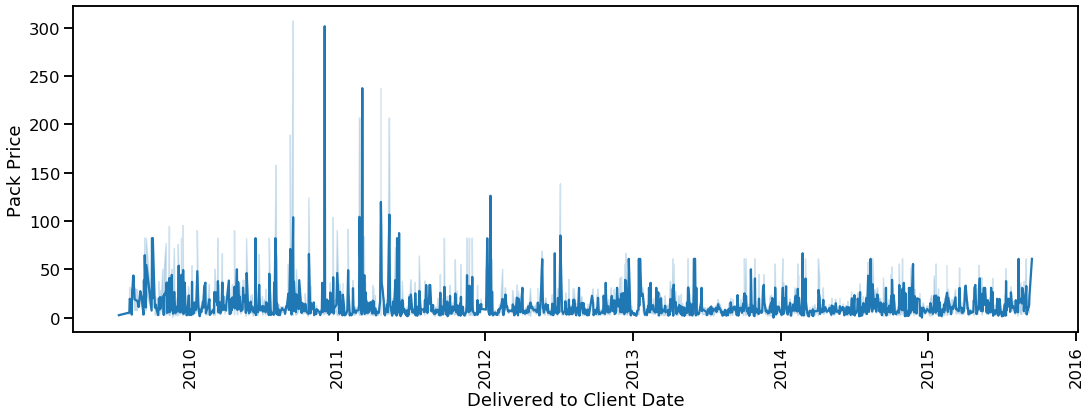

In [69]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.lineplot('Delivered to Client Date','Pack Price', data = sc_df)
plt.show()

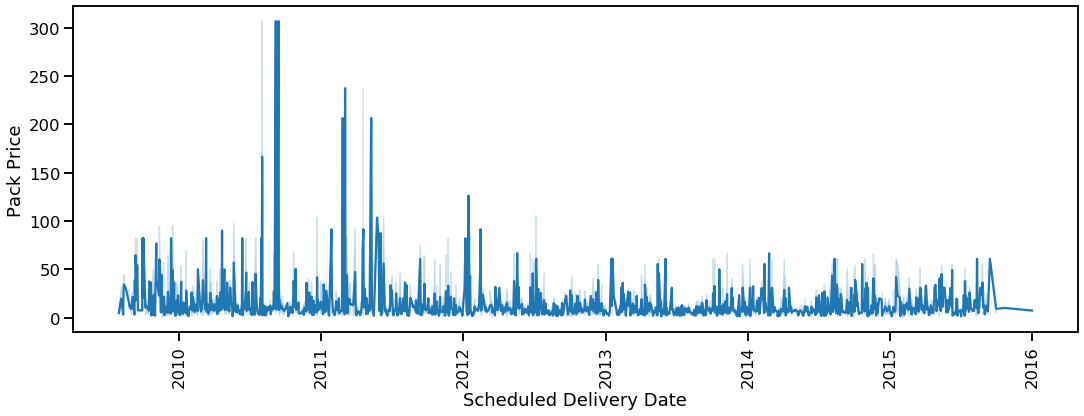

In [70]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.lineplot('Scheduled Delivery Date','Pack Price', data = sc_df)
plt.show()

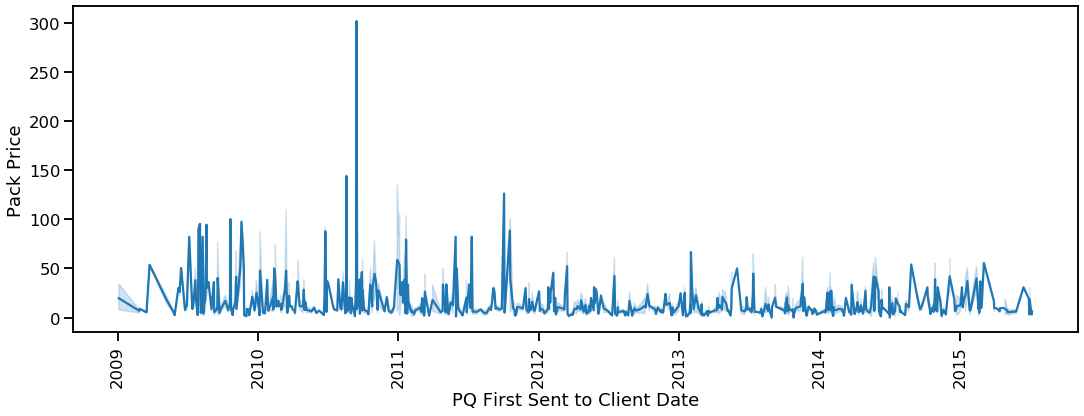

In [71]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.lineplot('PQ First Sent to Client Date','Pack Price', data = sc_df)
plt.show()

In [ ]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.lineplot('Delivery Recorded Date','Pack Price', data = sc_df)
plt.show()

In [ ]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.lineplot('Delivery Recorded Date','Freight Cost (USD)', data = sc_df)
plt.show()

In [ ]:
#anova
y = sc_df['Pack Price']
model = ols('y ~ C(Q("Country"))', data=sc_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Pack Price - Country")
display(anova_table)

model = ols('y ~ C(Q("Fulfill Via"))', data=sc_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Pack Price - Fulfill Via")
display(anova_table)

model = ols('y ~ C(Q("Shipment Mode"))', data=sc_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Pack Price - Shipment Mode")
display(anova_table)

model = ols('y ~ C(Q("Product Group"))', data=sc_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Pack Price - Product Group")
display(anova_table)

model = ols('y ~ C(Q("Sub Classification"))', data=sc_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Pack Price - Sub Classification")
display(anova_table)

model = ols('y ~ C(Q("Brand"))', data=sc_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Pack Price - Brand")
display(anova_table)

model = ols('y ~ C(Q("Dosage Form"))', data=sc_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Pack Price - Dosage Form")
display(anova_table)

In [ ]:
data_crosstab = pd.crosstab(sc_df['Pack Price'], sc_df['Delivered to Client Date'], 
margins = False)  

stat, p, dof, expected = chi2_contingency(data_crosstab)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

In [ ]:
data_crosstab = pd.crosstab(sc_df['Pack Price'], sc_df['Freight Cost (USD)'], 
margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

In [ ]:
TotalPrice = sc_df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=sc_df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

Top Country for Pack Price : South Africa - 18,240.29

In [ ]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=sc_df.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top Manufacturing Site : Aurobindo Unit III, India - 2188

In [ ]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot('Shipment Mode','Pack Price', data = sc_df)
plt.show()

In [ ]:
sc_df.to_csv('sc_df.clean1.csv')